

### Step 1: Setup - Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("all lib are imported!")

all lib are imported!


### Step 2: Data Loading and inspection of the dataset


In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
if df is None:
  print("DataFrame is empty")
else:
  print("DataFrame Created!")

DataFrame Created!


- Using Head and Tail methods to look into the DataFrame structure.

In [ ]:
print(df.head(2))
#provides the first 2 rows


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [ ]:
print(df.tail(2))
#provides the last 2 rows

     PassengerId  Survived  Pclass                   Name   Sex   Age  SibSp  \
889          890         1       1  Behr, Mr. Karl Howell  male  26.0      0   
890          891         0       3    Dooley, Mr. Patrick  male  32.0      0   

     Parch  Ticket   Fare Cabin Embarked  
889      0  111369  30.00  C148        C  
890      0  370376   7.75   NaN        Q  


In [ ]:
print(df.shape)
#provides the shape of the dataframe

(891, 12)


In [ ]:
print(df.info())
#provides the entire dataset value with their column names
#also helps  to find the missing / null values in the particluar columns count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
pd.set_option("display.max_rows",900)
pd.set_option("display.max_columns",None)
print(df.describe())
#provides a descriptive info about the integer values

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


- counting the number of peoples in the cabins

In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
E101,3
C22 C26,3
F33,3
C83,2


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
#TEST PLTONG WITH SEABORN
survival_data = df['Survived'].value_counts().rename(index={0: "Dead", 1: "Alive"}).reset_index()
#mapping the data
survival_data.columns = ["survived","counts"]
print(survival_data) #shows the data with column


  survived  counts
0     Dead     549
1    Alive     342


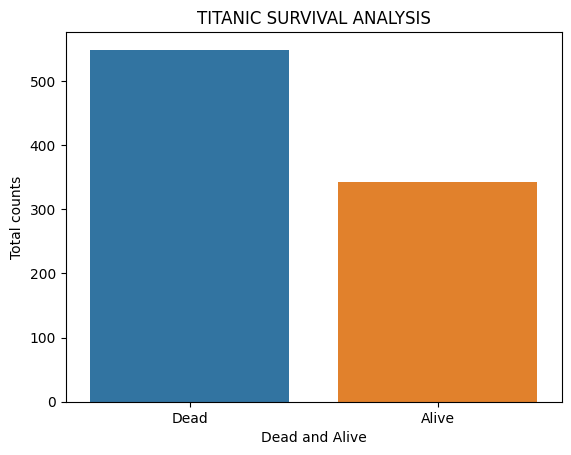

In [ ]:
#plotting the data in barchart
color_pallet = ["",""]
sns.barplot(data=survival_data,x="survived",y="counts",hue="survived")
plt.xlabel("Dead and Alive")
plt.ylabel("Total counts")
plt.title("TITANIC SURVIVAL ANALYSIS")
plt.show()

##Step 3: Data Cleaning
- Numerical values will be handeled using median as it dosent affected by outliers

- Categorial values will be filled/handeled by using mode(most frequent value)

- If too many missing values, impuatation of the column must be effective


In [ ]:
df.isnull()
#this provides the null values in (true) bool output

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.isnull().sum()
#sum up the entire missing data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- Dealing with the age column

In [ ]:
#filling with the median value

median = df["Age"].median()
print(median)

28.0


- Filling the missing values in Age with the median value

In [ ]:
df["Age"].fillna(median)

,Age
0,22.00
1,38.00
2,26.00
3,35.00
4,35.00
5,28.00
6,54.00
7,2.00
8,27.00
9,14.00


In [ ]:
#need to fill in the missing values in original

df['Age'] = df['Age'].fillna(median)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- setting up the Embarked values

In [ ]:
mod = df['Embarked'].mode()[0]
print(mod)

S


In [ ]:
df['Embarked'] = df['Embarked'].fillna(mod)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- Filling the missing values in the Cabin

(dealing with this data like, if person got cabin he will be selected for 1st class.. rest 3rd class)

(when the data is in bool format chnaging to int datatype helps solving fast)

In [ ]:
df['Cabin'].notna().astype(int).value_counts().rename({0: "Empty",1: "Not Empty"})
#checking the true and flase data

,count
Cabin,
Empty,687
Not Empty,204


Created a new column "has_cabin" for the person who got Cabins

In [ ]:
df["has_cabin"] = df['Cabin'].notna().astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
#removed the cabin column
df.drop("Cabin",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Below will show the new dataset #cleandataset

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##step4 : Graphical representation

In [ ]:
#univariate -> taking 1data or one column
#for category ->piechat, scatter plot, countplot, frequency
#numerical -> bar,histo,box

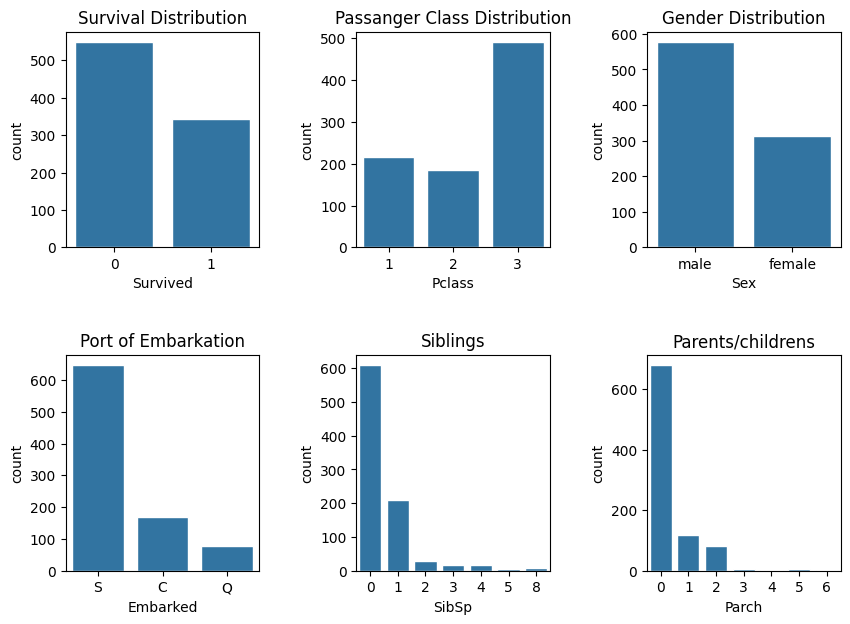

In [ ]:
fig , axis = plt.subplots(2,3, figsize=(10,7)) #subplot helps to create mant graphs in a single chart (2rows , 3 column)
sns.set_style(style='dark')
sns.countplot(ax=axis[0,0],x='Survived', data=df).set_title("Survival Distribution")
sns.countplot(ax=axis[0,1],x='Pclass', data=df).set_title("Passanger Class Distribution")
sns.countplot(ax=axis[0,2],x='Sex', data=df).set_title("Gender Distribution")
sns.countplot(ax=axis[1,0],x='Embarked', data=df).set_title("Port of Embarkation")
sns.countplot(ax=axis[1,1],x='SibSp', data=df).set_title("Siblings")
sns.countplot(ax=axis[1,2],x='Parch', data=df).set_title("Parents/childrens")

plt.subplots_adjust(wspace=.5,hspace=.5)

- numerical analysis


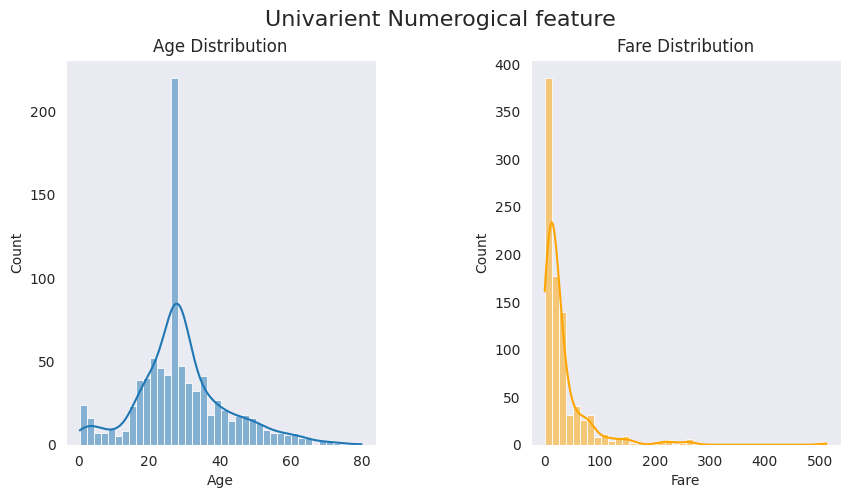

In [ ]:
fig , axes = plt.subplots(1,2,figsize=(10,5))

fig.suptitle("Univarient Numerogical feature", fontsize=16)
sns.set_style(style="darkgrid")
sns.histplot(ax =axes[0] ,data=df, x="Age",bins=40,kde=True).set_title("Age Distribution")
sns.histplot(ax =axes[1] ,data=df, x="Fare",bins=40,kde=True,color="orange").set_title("Fare Distribution")
plt.subplots_adjust(wspace=.5,hspace=.5)

##Bivarient Analysis
where 2 data or column used to represent the data
- categorical vs numerical  -> barchart, boxplot
- categorical vs categorical ->barchart , crosstables
- numerical vs numerical -> scatter plot

BIVARIENT ANALYSIS: Features vs Survival


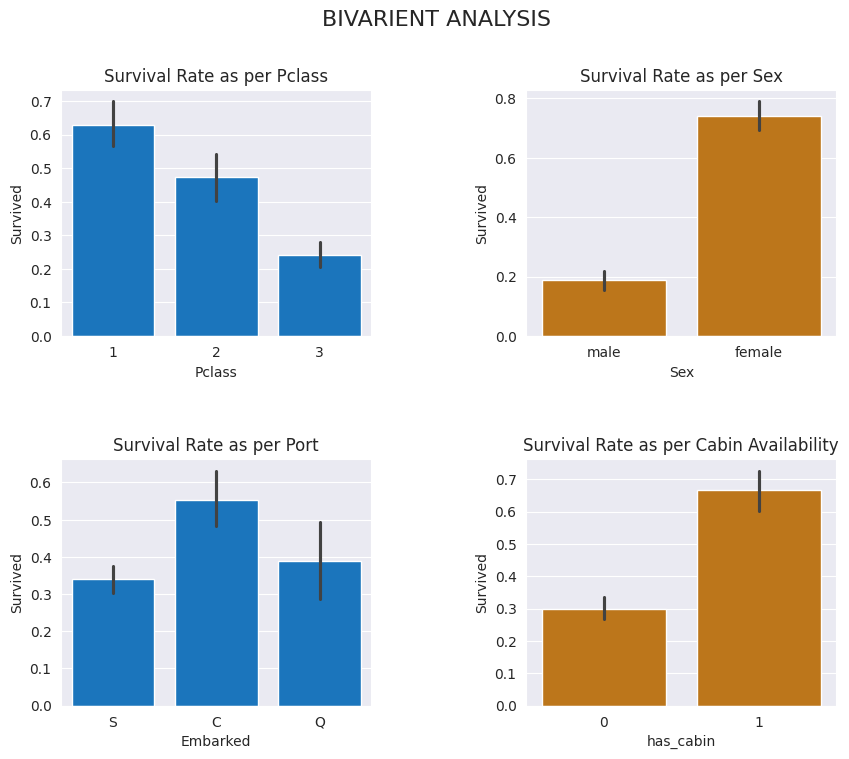

In [ ]:
print("BIVARIENT ANALYSIS: Features vs Survival")

fig , axes = plt.subplots(2,2, figsize=(10,8))
fig.suptitle("BIVARIENT ANALYSIS",fontsize=16)
color = ["#0078D7","#D77900"]
sns.barplot(ax=axes[0,0],data=df, x="Pclass", y="Survived",color=color[0]).set_title("Survival Rate as per Pclass")
sns.barplot(ax=axes[0,1],data=df, x="Sex", y="Survived",color=color[1]).set_title("Survival Rate as per Sex")
sns.barplot(ax=axes[1,0],data=df, x="Embarked", y="Survived",color=color[0]).set_title("Survival Rate as per Port")
sns.barplot(ax=axes[1,1],data=df, x="has_cabin", y="Survived",color=color[1]).set_title("Survival Rate as per Cabin Availability")

plt.subplots_adjust(wspace=0.5,hspace=0.5)

##Featuring 2 new columns Family_size and isAlone

In [31]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0


In [35]:
df["Family_size"] = df['Parch'] + df['SibSp'] + 1 #+1 for the person itself
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


##Adding another column is alone

In [39]:
df['isAlone'] = (df['Family_size'] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,Family_size,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


##Representating the Family_size and isAlone survival rate in Graphical way

Text(0.5, 1.0, 'Survival rate as per Family')

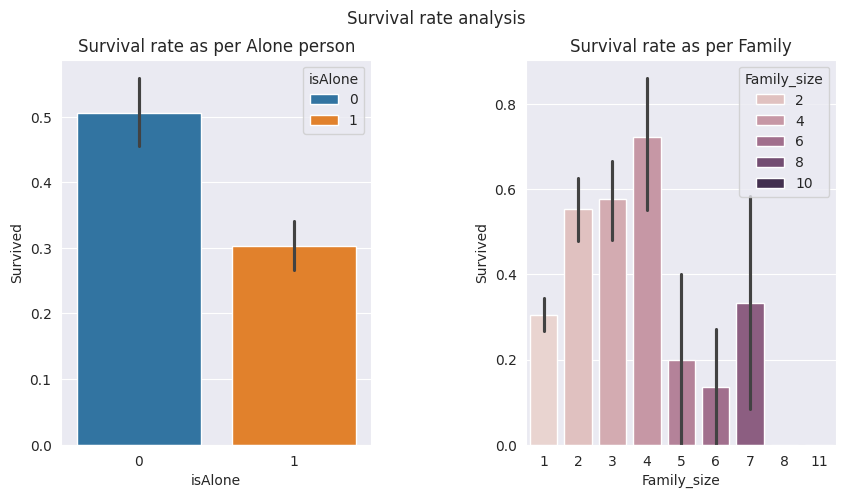

In [83]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.suptitle("Survival rate analysis")
sns.barplot(ax=axes[0],data = df, x="isAlone", y="Survived", hue="isAlone").set_title("Survival rate as per Alone person")
sns.barplot(ax = axes[1],data = df, x="Family_size", y="Survived", hue="Family_size").set_title("Survival rate as per Family")

In [86]:
#extracting the designation/title from the names

df['title'] = df['Name'].str.extract(r" ([A-Za-z]+)\.")
df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


<Axes: xlabel='title', ylabel='Survived'>

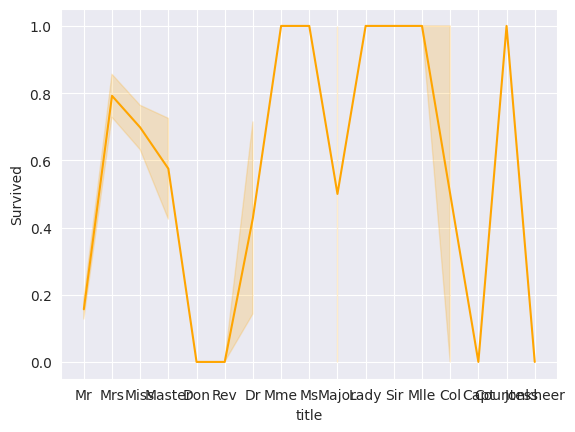

In [106]:
sns.lineplot(data=df,x="title",y="Survived",color="orange")

#Graphical analysis as per gender

Text(0.5, 1.0, 'Survival analysis as per gender')

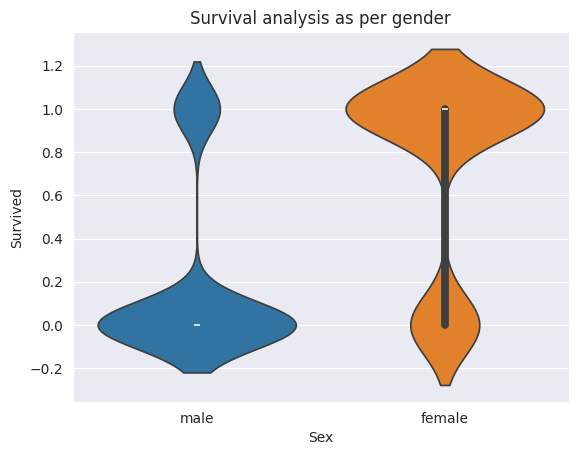

In [108]:
sns.violinplot(data=df,x="Sex",y="Survived",hue="Sex").set_title("Survival analysis as per gender")